<a href="https://colab.research.google.com/github/K-ra-droid/CodeWay/blob/main/CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CUSTOMER CHURN PREDICTION**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Load dataset
df = pd.read_csv('Churn_Modelling.csv')

# Print column names
print(df.columns)

# Split the data into features (X) and target variable (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exclude non-numeric columns (like 'Surname') from features
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_numeric, y_train)

# Predictions on the test set
rf_predictions = rf_model.predict(X_test_numeric)

# Evaluate Random Forest model
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

# Exclude non-numeric and categorical columns
non_numeric_columns = ['Surname', 'Geography', 'Gender']
X_train_numeric = X_train.select_dtypes(include=['number']).drop(columns=non_numeric_columns, errors='ignore')
X_test_numeric = X_test.select_dtypes(include=['number']).drop(columns=non_numeric_columns, errors='ignore')

# Train an XGBoost Classifier without one-hot encoding
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_numeric, y_train)

# Predictions on the test set without one-hot encoding
xgb_predictions = xgb_model.predict(X_test_numeric)

# Evaluate XGBoost model without one-hot encoding
print("\nXGBoost Classifier (without one-hot encoding):")
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Classification Report:\n", classification_report(y_test, xgb_predictions))

# One-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train[non_numeric_columns], drop_first=True)
X_test_encoded = pd.get_dummies(X_test[non_numeric_columns], drop_first=True)

# Align columns to ensure consistency between training and testing sets
X_train_final, X_test_final = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Concatenate numeric and encoded categorical columns
X_train_final = pd.concat([X_train_numeric, X_train_final], axis=1)
X_test_final = pd.concat([X_test_numeric, X_test_final], axis=1)

# Train an XGBoost Classifier with one-hot encoding
xgb_model_encoded = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model_encoded.fit(X_train_final, y_train)

# Predictions on the test set with one-hot encoding
xgb_predictions_encoded = xgb_model_encoded.predict(X_test_final)

# Evaluate XGBoost model with one-hot encoding
print("\nXGBoost Classifier (with one-hot encoding):")
print("Accuracy:", accuracy_score(y_test, xgb_predictions_encoded))
print("Classification Report:\n", classification_report(y_test, xgb_predictions_encoded))


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
Random Forest Classifier:
Accuracy: 0.862
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000


XGBoost Classifier (without one-hot encoding):
Accuracy: 0.851
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.67      0.47      0.55       393

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.73      2000
weighted avg       0.8

**DATA VISUALIZATION**

Exploratory Data Analysis (EDA)

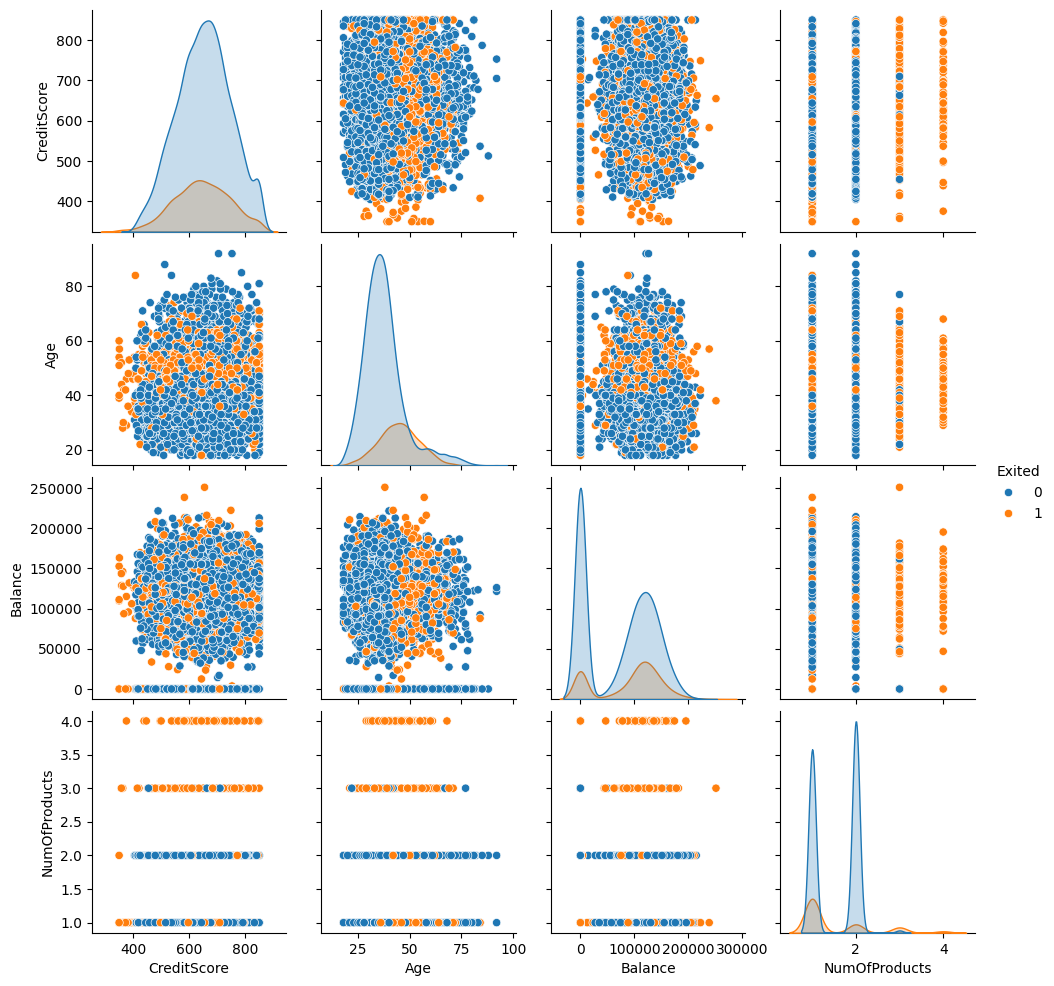

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'Exited']], hue='Exited')
plt.show()

Correlation Matrix

<ipython-input-14-c61ed2939e95>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


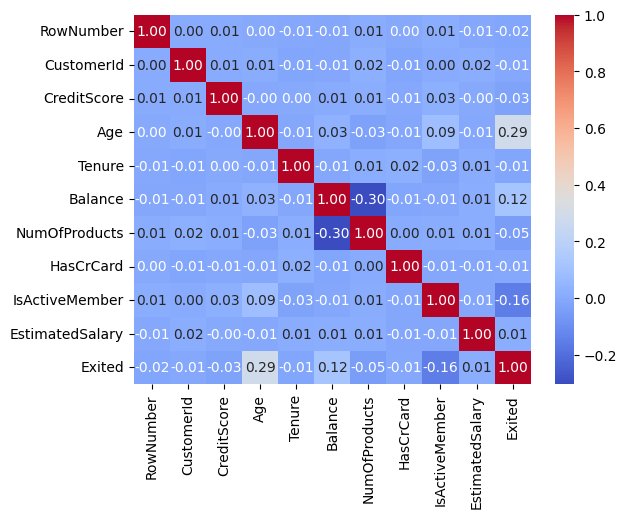

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Feature Importance

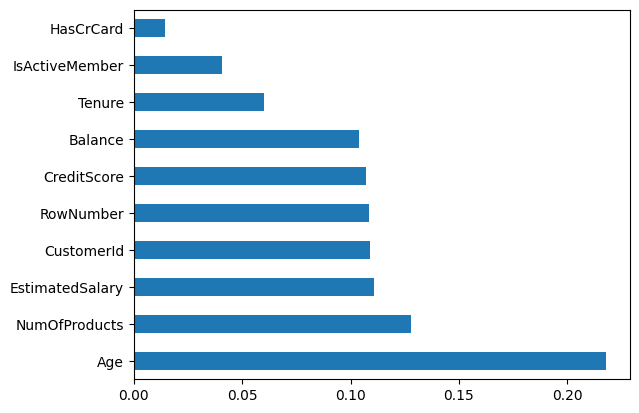

In [ ]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train_numeric.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

Model Evaluation Metrics

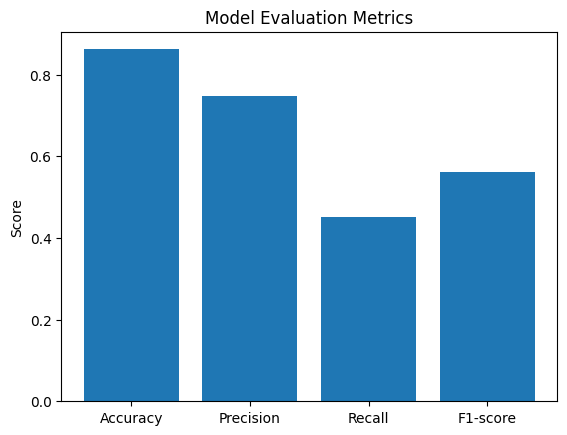

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

metrics = {'Accuracy': accuracy_score(y_test, rf_predictions),
           'Precision': precision_score(y_test, rf_predictions),
           'Recall': recall_score(y_test, rf_predictions),
           'F1-score': f1_score(y_test, rf_predictions)}

plt.bar(metrics.keys(), metrics.values())
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.show()

ROC Curve

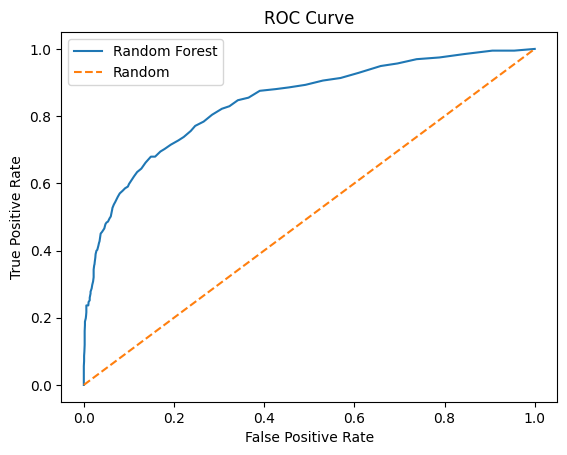

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

rf_probs = rf_model.predict_proba(X_test_numeric)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()